In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [4]:
df2 = df.pivot_table(values='signs_of_mental_illness',index=['race'],aggfunc=[len, np.sum])
df2

,len,sum
,signs_of_mental_illness,signs_of_mental_illness
race,,
A,93,24
B,1298,184
H,902,157
N,78,14
O,48,11
W,2476,713


In [5]:
def percentage_mental_illness(row):
    percentage = row['sum']/row['len']
    return percentage

In [6]:
df2['percentage_mental'] = df2.apply(lambda row: percentage_mental_illness(row), axis=1).round(2)
df2

,len,sum,percentage_mental
,signs_of_mental_illness,signs_of_mental_illness,
race,,,
A,93,24,0.26
B,1298,184,0.14
H,902,157,0.17
N,78,14,0.18
O,48,11,0.23
W,2476,713,0.29


In [7]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [8]:
df['date'] = pd.to_datetime(df['date'])
df['weekday'] = df['date'].dt.day_name()
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


In [9]:
df.groupby('weekday')['date'].count()

weekday
Friday       761
Monday       726
Saturday     721
Sunday       753
Thursday     810
Tuesday      816
Wednesday    829
Name: date, dtype: int64

In [10]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_dict = dict(zip(weekdays,range(len(weekdays))))
weekdays_dict

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [11]:
df['day_id'] = df['weekday']
df['day_id'] = df['day_id'].map(weekdays_dict)
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday,day_id
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,4
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday,4
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday,5
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday,6
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday,5
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday,5
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday,0
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday,1


In [12]:
df.groupby('day_id')['date'].count()

day_id
0    726
1    816
2    829
3    810
4    761
5    721
6    753
Name: date, dtype: int64

<BarContainer object of 7 artists>

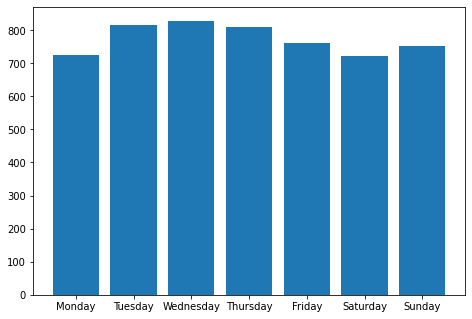

In [13]:
x = weekdays
y = df.groupby('day_id')['date'].count()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)

In [34]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
dfdf2=data[0]
dfdf2

,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).1","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).2","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).4","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO a

In [35]:
dfdf2.columns=[1,2,3,4,5,6,7,8,9,10]
dfdf2

,1,2,3,4,5,6,7,8,9,10
0,Codes:,Codes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ISO,"ISO 3166 codes (2-letter, 3-letter, and 3-digi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANSI,2-letter and 2-digit codes from the ANSI stand...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USPS,2-letter codes used by the United States Posta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USCG,2-letter codes used by the United States Coast...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
83,Nebraska,Obsolete postal code[g],NaN,NaN,NaN,NB,NaN,NaN,NaN,NaN
84,Northern Mariana Islands,Obsolete postal code[h],NaN,NaN,NaN,CM,NaN,NaN,NaN,NaN
85,Panama Canal Zone,Obsolete postal code,PZPCZ594,NaN,NaN,CZ,NaN,NaN,NaN,NaN
86,Philippine Islands,Obsolete postal code,PHPHL608[9],NaN,NaN,PI,NaN,NaN,NaN,NaN


In [36]:
dfdf2.drop([2,3,4,5,7,8,9,10], axis=1, inplace=True)
dfdf2.drop(dfdf2.tail(11).index, axis=0, inplace=True)
dfdf2

,1,6
0,Codes:,NaN
1,ISO,NaN
2,ANSI,NaN
3,USPS,NaN
4,USCG,NaN
...,...,...
72,Kingman Reef,NaN
73,Midway Islands,NaN
74,Navassa Island,NaN
75,Palmyra Atoll[c],NaN


In [39]:
state_dict = dict(zip(dfdf2[6],dfdf2[1]))
state_dict

{nan: 'Wake Island',
 'USPS': 'Name and status of region',
 'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',


In [40]:
df['state_name'] = df['state'].map(state_dict)

In [41]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday,day_id,state_name
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,4,Washington
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday,4,Oregon
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday,5,Kansas
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday,6,California
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday,6,Colorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday,5,Missouri
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday,5,California
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday,0,Kansas
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday,1,Illinois


In [42]:
data = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
dfdf=data[0]
dfdf

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]"
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%
2,3.0,4.0,Florida,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%
3,4.0,3.0,New York,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%
4,5.0,6.0,Pennsylvania,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%
5,6.0,5.0,Illinois,12671821,12830632,-1.2%,"−158,811",18,633591,703990,712864,3.85%
6,7.0,7.0,Ohio,11689100,11536504,1.3%,+152596,16,649394,730569,721032,3.53%
7,8.0,9.0,Georgia,10617423,9687653,9.6%,+929770,14,663589,758387,691975,3.18%
8,9.0,10.0,North Carolina,10488084,9535483,10.0%,+952601,13,699206,806776,733498,3.14%
9,10.0,8.0,Michigan,9986857,9883640,1.0%,+103217,14,624179,713347,705974,3.02%


In [45]:
population_dict = dict(zip(dfdf['State'],dfdf['Population estimate, July 1, 2019[2]']))
population_dict

{'California': 39512223,
 'Texas': 28995881,
 'Florida': 21477737,
 'New York': 19453561,
 'Pennsylvania': 12801989,
 'Illinois': 12671821,
 'Ohio': 11689100,
 'Georgia': 10617423,
 'North Carolina': 10488084,
 'Michigan': 9986857,
 'New Jersey': 8882190,
 'Virginia': 8535519,
 'Washington': 7614893,
 'Arizona': 7278717,
 'Massachusetts': 6949503,
 'Tennessee': 6833174,
 'Indiana': 6732219,
 'Missouri': 6137428,
 'Maryland': 6045680,
 'Wisconsin': 5822434,
 'Colorado': 5758736,
 'Minnesota': 5639632,
 'South Carolina': 5148714,
 'Alabama': 4903185,
 'Louisiana': 4648794,
 'Kentucky': 4467673,
 'Oregon': 4217737,
 'Oklahoma': 3956971,
 'Connecticut': 3565287,
 'Utah': 3205958,
 'Puerto Rico': 3193694,
 'Iowa': 3155070,
 'Nevada': 3080156,
 'Arkansas': 3017825,
 'Mississippi': 2976149,
 'Kansas': 2913314,
 'New Mexico': 2096829,
 'Nebraska': 1934408,
 'Idaho': 1787065,
 'West Virginia': 1792147,
 'Hawaii': 1415872,
 'New Hampshire': 1359711,
 'Maine': 1344212,
 'Montana': 1068778,
 'Rhod

In [46]:
df['state_population'] = df['state_name'].map(population_dict)

In [47]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday,day_id,state_name,state_population
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,4,Washington,7614893
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday,4,Oregon,4217737
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday,5,Kansas,2913314
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday,6,California,39512223
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday,6,Colorado,5758736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday,5,Missouri,6137428
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday,5,California,39512223
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday,0,Kansas,2913314
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday,1,Illinois,12671821


In [52]:
df4 = df.pivot_table(values='state_population',index=['state_name'],aggfunc=[np.mean, len])
df4

,mean,len
,state_population,state_population
state_name,,
Alabama,4903185,104
Alaska,731545,39
Arizona,7278717,254
Arkansas,3017825,83
California,39512223,799
Colorado,5758736,195
Connecticut,3565287,21
Delaware,973764,13


In [53]:
def per_population(row):
    per = row['len']/row['mean']*1000
    return per

In [56]:
df4['killings_per_1000'] = df4.apply(lambda row: per_population(row), axis=1)
df4

,mean,len,killings_per_1000
,state_population,state_population,
state_name,,,
Alabama,4903185,104,0.021211
Alaska,731545,39,0.053312
Arizona,7278717,254,0.034896
Arkansas,3017825,83,0.027503
California,39512223,799,0.020222
Colorado,5758736,195,0.033862
Connecticut,3565287,21,0.005890
Delaware,973764,13,0.013350
